<a href="https://colab.research.google.com/github/yenlung/Deep-Learning-Basics/blob/master/colab04_%E7%94%A8_Gradio2_%E5%BF%AB%E9%80%9F%E6%89%93%E9%80%A0_NLP_WebApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Gradio](https://gradio.app/) 是很方便可以把你 AI model 做成網路 app 的套件。現在還可以配合 [Hugging Face 的 transformers 套件](https://huggingface.co/transformers/), 很快用名門 model, 做出一個 NLP 應用!

### 1. 安裝 `gradio`

In [ ]:
!pip install gradio

     |████████████████████████████████| 2.4MB 4.1MB/s 
     |████████████████████████████████| 215kB 34.2MB/s 
     |████████████████████████████████| 1.9MB 38.9MB/s 
     |████████████████████████████████| 3.2MB 41.7MB/s 
     |████████████████████████████████| 962kB 32.9MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=1bd68e97d872d49ef0f0dc3f3de95fe0e632102ce83c14d43ebb9041040b0934
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=ed61019d7337f1e53dd8c6e6ffd4a63c231b7d3b0bad5b441ab16e0995b99683
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
Successfully built ffmpy flask-cachebuster


### 2. 用 `gpt2` 唬爛王小試一下身手

`transformers` 套件提供很多名門套件給你使用! 我們來試試使用前一代的唬爛王 GPT-2 試試。



In [ ]:
import gradio as gr

In [ ]:
gr.Interface.load('huggingface/gpt2').launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://20023.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://20023.gradio.app')

一行就寫出 GPT-2!! 而且這裡用的是 Hugging Face 的運算資源, 所以你連 `transformers` 都沒有裝。當然, 如果自己裝一下 `transformers` 有時會更順一點。

很酷的是我們在 Colab 執行時，自動進入 share 的狀態, 也就是會有個 `https://xxxx.gradio.app` 這個網址, 這在其他電腦、行動裝置的瀏覽器連到這個網址, 就可以使用! 也就是你用差不多一行, 就完成了一個 NLP Web App!

### 3. 尋找社群提供的 models

雖然 `transformers` 本來就內建很多名門 transformer 的 models, 但有時, 比如我們想用中文的 NLP, 可以選擇的就很少。這時我們可去搜尋有沒有社群提供的 model:

[Hugging Face Model Hub](https://huggingface.co/models)

比如我們搜尋 Chinese, 可以找到中研院 [CKIP Lab 中文詞知識庫小組](https://ckip.iis.sinica.edu.tw/)發佈的一些 `transformers` 預訓練好的 models。

我們找到一個叫 `ckiplab/gpt2-base-chinese` 的 model, 點進去 copy 這個 model 的名稱。

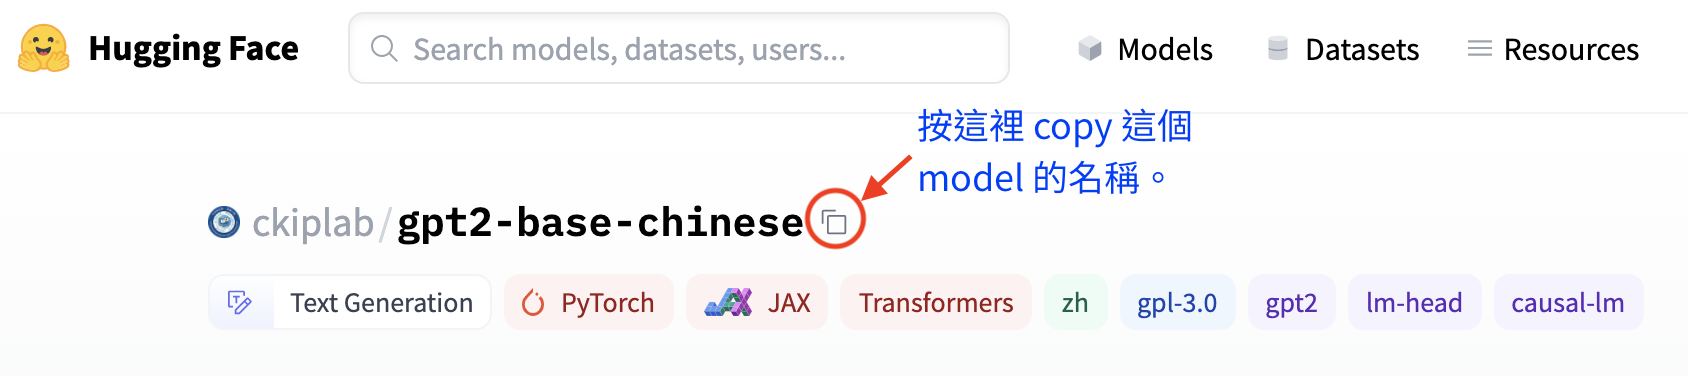

In [ ]:
gr.Interface.load("huggingface/ckiplab/gpt2-base-chinese").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://13748.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://13748.gradio.app')

### 4. 寫歌機器人

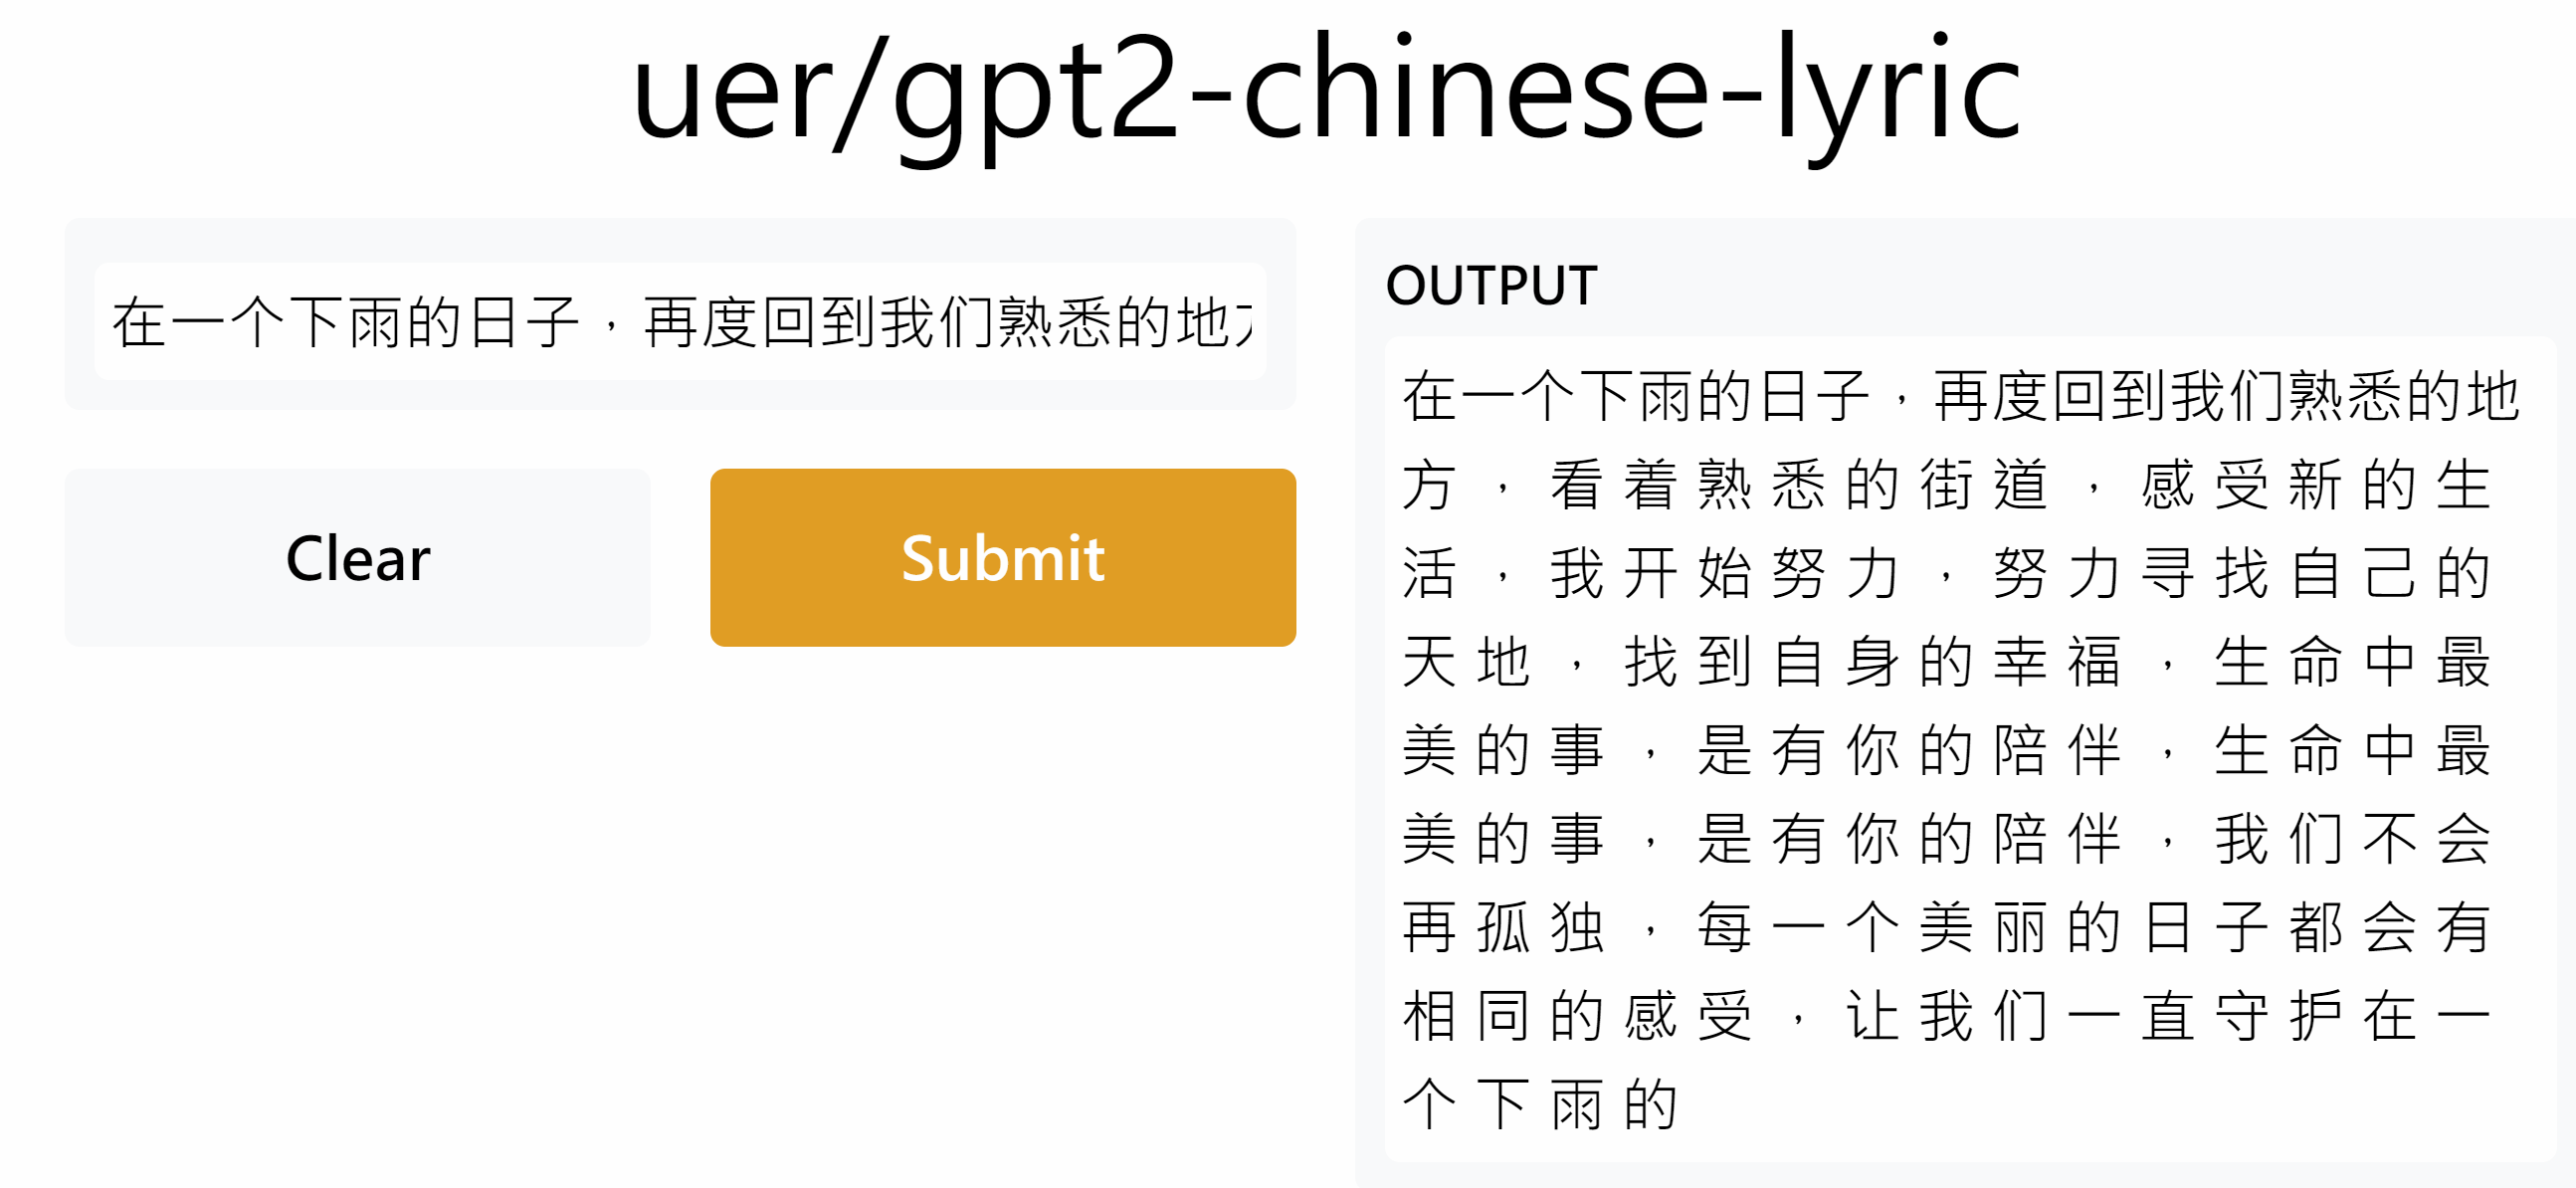

我們發現, 簡體中文的 models 還是比較多, 使用上我們就需要先把繁體轉簡體。這可以用一個叫 `opencc` 的套件。

In [ ]:
!pip install opencc-python-reimplemented

     |████████████████████████████████| 491kB 3.8MB/s 
  Created wheel for opencc-python-reimplemented: filename=opencc_python_reimplemented-0.1.6-py2.py3-none-any.whl size=486151 sha256=4056225dec960dc0a1ca07b63b26fd491559c01b27aba808b5ac305f9418ec4f
  Stored in directory: /root/.cache/pip/wheels/54/8a/0f/405db0ba3f02d9af8211422d3ae94c47b3296256f168ac1e68
Successfully built opencc-python-reimplemented


In [ ]:
from opencc import OpenCC

cc = OpenCC('t2s')

In [ ]:
text = "在一個下雨的日子，再度回到我們熟悉的地方"

cc.convert(text)

'在一个下雨的日子，再度回到我们熟悉的地方'

In [ ]:
gr.Interface.load("huggingface/uer/gpt2-chinese-lyric", 
                  inputs="text", outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://35255.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://35255.gradio.app')

### 4. 學習 `transformers` 和 `gradio`

如果要學更多 `transformers`, 非常推薦 Hugging Face 的[官方課程](https://huggingface.co/course/chapter1)!

Gradio 的[快速入門](https://gradio.app/getting_started) 去學怎麼把 gradio 用在你自己的 models 上。

另外, 你也可以到 [Gradio Hub](https://gradio.app/hub) 看許多有趣的範例。